# Reading, writing and plotting data

One of the transverse usages of MATLAB is as a tool for analyzing and plotting
data coming from the most various sources. This material covers the commands
and the ideas we may need to perform these tasks.

As you should remember from the introduction to the language, in MATLAB
the most natural way of representing data is with matrices, scalars are
$1\times 1$ matrices. But how can you **populate these matrices** with the data
coming from your experiments? **Are** always **matrices** the **right format**?

We will start with an *example*, from
[here](https://raw.githubusercontent.com/Cirdans-Home/recipesforenvsciences2023/main/src/data/london_combined_2019_all.csv)
you can download a **csv** file containing information on the quantity of
pm2 particles from pollution stations in the city of London in 2019.

:::{tip}
CSV stands for comma-separated values. These are delimited text files which use
a comma to separate values. **Each line** of the file is **a data record**.
**Each record** consists of **one or more fields**, separated by commas.

In most of them the separator is indeed a comma, and this justifies the source
of the name for the format. Nevertheless, this is not always the case, and
other delimiters can be found. In well formatted files each line will have
the same number of fields.
:::

Let us work with the data we have just downloaded. First of all, we create
a new *MATLAB script* called  `londonpollution.m`, and we put the downloaded
data in the same folder of the script

```{code-block} matlab
%% London Pollution Data
% Analysis of the Pollution data from London.

clear; clc; close all;
```
If you look at the first lines of the CSV file you have downloaded, you will
see that in the same file appear different types of data, *strings*, *numbers*,
*datetime*, and so on. This means that we **cannot store** all these information
in a matrix. Matrices only take data of homogeneous type. The right type of
variable to use is a `table`.

We use the command `readtable` to load all this information into MATLAB
```{code-block} matlab
london = readtable('london_combined_2019_all.csv');
```
After these are in memory, you can get some information on the variable by
writing in the **command line**:
```{code-block} matlab
whos london
```
and getting the answer
```{code-block} bash
Name            Size               Bytes  Class    Attributes
london      24676x9             16527487  table   
```
that tells us that we have loaded a table with 24676 rows, divided in 9 columns.
Again from the command window we can look at what are the first rows by doing:
```{code-block} matlab
head(london)
```
that prints out
```{code-block} bash
>> head(london)

ans =

  8×9 table

      city      latitude    longitude    country            utc                       location               parameter     unit      value
    ________    ________    _________    _______    ___________________    ______________________________    _________    _______    _____

    'London'     51.453     0.070766      'GB'      2019-02-18 23:00:00    'London Eltham'                    'pm25'      'ug/m3'      7  
    'London'     51.489     -0.44161      'GB'      2019-02-18 23:00:00    'London Harlington'                'pm25'      'ug/m3'      8  
    'London'     51.523     -0.15461      'GB'      2019-02-18 23:00:00    'London Marylebone Road'           'pm25'      'ug/m3'     17  
    'London'     51.521     -0.21349      'GB'      2019-02-18 23:00:00    'London N. Kensington'             'pm25'      'ug/m3'      8  
    'London'     51.425     -0.34561      'GB'      2019-02-18 23:00:00    'London Teddington Bushy Park'     'pm25'      'ug/m3'      8  
    'London'     51.495     -0.13193      'GB'      2019-02-18 23:00:00    'London Westminster'               'pm25'      'ug/m3'     11  
    'London'     51.544     -0.17527      'GB'      2019-02-19 00:00:00    'Camden Kerbside'                  'pm25'      'ug/m3'      9  
    'London'     51.453     0.070766      'GB'      2019-02-19 00:00:00    'London Eltham'                    'pm25'      'ug/m3'      7  
```

Let us now try to add some commands to our script to produce plots showing us
information on the data.

We focus on the first of the locations `London Eltham`, and we want to plot the
quantity of pm25 we have measured in the whole period. For doing this we need
to perform a slicing of the data. We need to find the rows that correspond to
this location, we can do this by using the command
```{code-block} matlab
index = strcmp(london.location,'London Eltham');
```
at the end of this call the variable `index` will be a vector having a `1` in
position `i` if `london.location(i)` is `'London Eltham'`, and a `0` otherwise.
With this knowledge we can now produce a `plot` of these values by adding to
the script
```{code-block} matlab
figure(1)
plot(london.utc(index),london.value(index),'o')
xlabel('UTC');
ylabel('pm25 ug/m3');
```
obtaining
```{image} images/london-eltham.png
:alt: Quantity of pm25 in London Eltham
:width: 600px
:align: center
```
Now let us repeat the same task for all the different location. We want to
produce now a single plot with different subplots in which each of them has
one of the Locations. Since we do not want to rewrite many times the same
piece of code, we will make use of a `for` cycle
```{code-block} matlab
location = unique(london.location);

for i=1:length(location)
    index = strcmp(london.location,location{i});
    figure(2)
    subplot(5,2,i)
    plot(london.utc(index),london.value(index),'o')
    xlabel('UTC');
    ylabel('pm25 ug/m3');
    title(location{i});
end
```
The first line `location = unique(london.location);` produces, as you may guess,
the unique list of locations of our table. If we ask it on the command window,
we discover that these are
```{code-block} bash
>> location

location =

  10×1 cell array

    {'Camden Kerbside'             }
    {'London Bexley'               }
    {'London Bloomsbury'           }
    {'London Eltham'               }
    {'London Harlington'           }
    {'London Marylebone Road'      }
    {'London N. Kensington'        }
    {'London Teddington Bushy Park'}
    {'London Westminster'          }
    {'Southend-on-Sea'             }
```
Then we loop the code for all the unique locations and repeat the same procedure
as before, with some small difference. When we look for the `index` vector
we now do the comparison with each and every location by looping through the
location `cell array` with the `i` index, i.e., `index = strcmp(london.location,location{i});`.
Then the remaining part is pretty much the same, a part from the command `subplot`
that tell us the number of panels in which we want to subdivide `figure(2)`, in
this case 5 rows and 2 columns, and in which of them we are going to plot, the
$i$th panel at cycle `i`. If we run all this code, we get:
```{image} images/london-allplaces1.png
:alt: Quantity of pm25 in London
:width: 600px
:align: center
```
A variant of this idea could be the one of having all the plots overlapped
on the same figure to do a fast comparison
```{code-block} matlab
Markers = {'+','o','*','x','v','d','^','s','>','<'};
for i=1:length(location)
    index = strcmp(london.location,location{i});
    figure(3)
    hold on
    plot(london.utc(index),london.value(index),Markers{i},'DisplayName',location{i})
    hold off
end
xlabel('UTC');
ylabel('pm25 ug/m3');
legend('Location','eastoutside');
```
from which we obtain
```{image} images/london-allplaces2.png
:alt: Quantity of pm25 in London
:width: 700px
:align: center
```
We have introduced here several new keywords,
- `hold on` retains plots in the current axes so that new plots added to the
axes do not delete existing plots.
- `hold off` sets the hold state to off so that new plots added to the axes
clear existing plots and reset all axes properties.
- `legend` creates a legend with descriptive labels for each plotted data
series. For the labels, the legend uses the text from the `DisplayName`
properties of the data series.

This visual comparison we have constructed is, however, rather inconclusive.
Let us try producing a **box plot** for the different locations. This can be
done with:
```{code-block} matlab
figure(4)
boxplot(london.value,london.location);
ylabel('pm25 ug/m3');
xtickangle(30)
```
that produces
```{image} images/london-allplaces3.png
:alt: Quantity of pm25 in London
:width: 600px
:align: center
```
The commands we have used here are
- `boxplot(x,g)` creates a box plot using one or more grouping variables
contained in `g`. `boxplot` produces a separate box for each set of `x`
values that share the same `g` value or values.
- `xtickangle` rotates the x-axis tick labels for the current axes to the
specified angle in degrees, where 0 is horizontal. Specify a positive value
for counterclockwise rotation or a negative value for clockwise rotation.

From this figure we discover that living in *Marylebone Road* is worse on
average for the quantity of pm25.

```{danger}
The following part depends on having the Mapping Toolbox installed.
```

To conclude this part, let us put some of these information on a geographical
map. First we need to collect the *latitudes* and *longitudes* of the
different locations, then we decide that the size of the marker on the map
will be given by the `mean` of the values of pm25 in that location:
```{code-block} matlab
latitude = zeros(10,1);
longitude = zeros(10,1);
average = zeros(10,1);
for i=1:10
    index = strcmp(london.location,location{i});
    latitude(i) = unique(london.latitude(index));
    longitude(i) = unique(london.longitude(index));
    average(i) = mean(london.value(index));
end
figure(5)
tab = table(latitude,longitude,average);
gb = geobubble(tab,'latitude','longitude', ...
    'SizeVariable','average');
gb.SizeLegendTitle = 'Average pm25';
geobasemap colorterrain
```
from which we get
```{image} images/london-allplaces4.png
:alt: Quantity of pm25 in London
:width: 600px
:align: center
```
A better view using a map including the streets can be obtained by doing
```{code-block} matlab
figure(6)
gb = geobubble(tab,'latitude','longitude', ...
    'SizeVariable','average');
gb.SizeLegendTitle = 'Average pm25';
name = 'openstreetmap';
url = 'a.tile.openstreetmap.org';
copyright = char(uint8(169));
attribution = copyright + "OpenStreetMap contributors";
addCustomBasemap(name,url,'Attribution',attribution)
geobasemap openstreetmap
gb.MapLayout = 'maximized';
```
from which we obtain
```{image} images/london-allplaces5.png
:alt: Quantity of pm25 in London
:width: 600px
:align: center
```

::::{margin}
![Mandelbrot set with 1000 iterations.](/images/mandelbroot.png)
::::

::::{exercise}
Let's explore MATLAB's * plot * functions again. We try to produce a print of the whole
[Mandelbrot fractal](https://en.wikipedia.org/wiki/Mandelbrot_set). This set is
the set is the set of complex numbers $ c $ for which the function $ f_{c}(z) = z^{2} + c$
does not **diverge** when iterated starting from $ z = 0 $, that is, the set
of those points $ c $ so the sequence $ f_{c} (0), f_{c} (f_{c} (0)), \ldots $
remains limited in absolute value. We can build a MATLAB *script* that allows
us to draw an approximation of this set.
1. We use the `linspace` function to construct the set of numbers
$ c $ complexes on which we want to evaluate. Since `linspace` produces one
real vector for us, we need to construct two of them -- one for each direction --
and transform them into a set of evaluation pairs with the` meshgrid` function.
A good real set to evaluate to draw the Mandelbrot set is $ [- 2.1,0.6] \times [-1.1,1.1] $.
2. Now that we have the real evaluations, we need to transform $ c $ into
complex numbers. We can do this by using the `complex` function:` C = complex (X, Y) `
on the pair of evaluation matrices obtained from` meshgrid`.
3. We can now implement a fixed number of iterations of the function $ f_{c} (z) = z^{2} + c $
using a `for` loop.
4. We conclude the exercise by drawing the Mandelbrot set with the function
```matlab
contourf(x,y,double(abs(Z)<1e6))
title('Mandelbrot set')
```
which is a good chance to see what the *plot* function does `contourf`
(`help contourf`).
:::::

:::{tip}
There are many others plotting functions, but we will focus on them in the
following topics, while we solve problems for which they will be useful.
:::

## Principal Component Analysis

Principal Component Analysis (PCA) is just a method of **summarizing some data**.
Whenever we collect data from an experiment we expect it to be described by a
large number of characteristics, but fortunately *many* of them will *measure related properties*
and so will be **redundant**. We could therefore think of "throwing away" some
data to keep only the significant ones. Instead, PCA constructs some **new characteristics**
that better summarize our list of data. Such characteristics will always be
constructed by using the old ones.

Such **new characteristics** will be constructed as **linear combinations** of
the available data and will be constructed in such a way to **retain** as much as
possible of the **variation** present **in the data** set.

We can describe PCA in many ways, the simplest way being to describe it in
terms of the **data matrix factorization**. So we can take advantage of the
knowledge of *(numerical) linear algebra* that we dusted off in our introduction
to MATLAB.

Consider an $n\times p$ data matrix, $X$, with column-wise zero empirical mean
(the sample mean of each column has been shifted to zero), where each of the
$n$ rows represents a different repetition of the experiment, and each of the
$p$ columns gives a particular kind of feature (e.g, the results obtained from
a particular sensor).

PCA is then **defined** as an _orthogonal linear transformation_ that transforms
the data to a **new coordinate system** such that
1. the greatest variance by some scalar projection of the data comes to lie on
the first coordinate: the first principal component;
2. the second greatest variance on the second coordinate;
3. the third on the third;

Mathematically, the transformation is defined by a set of size $l$ of $p$-dimensional
vectors of weights or coefficients $\mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}$
that map each row vector $\mathbf{x}_{(i)}$ of $X$ to a new vector of principal
component scores ${\displaystyle \mathbf {t} _{(i)}=(t_{1},\dots ,t_{l})_{(i)}}$,
given by
```{math}
{\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,l}
```
in such a way that the individual variables ${\displaystyle t_{1},\dots ,t_{l}}$
of $t$ considered over the data set successively inherit the maximum possible
variance from $X$, with each coefficient vector $w$ constrained to be a unit
vector. To **reduce dimensionality** we need $l \ll p$!

### Computing the PCA: Eingevalues and Singular Values

To simply express this transformation we can use the following **matrix factorization**,
that is called *singular value decomposition* (SVD) of the matrix $X$,
```{math}
    X = U \Sigma W^T
```
Here $\Sigma$ is an $n$-by-$p$ rectangular diagonal matrix of positive numbers
$\sigma_k$, called the **singular values** of $X$; $U$ is an $n$-by-$n$ matrix,
the columns of which are **orthogonal unit vectors** of length $n$ called the
left singular vectors of $X$; and $W$ is a $p$-by-$p$ matrix whose columns are
orthogonal unit vectors of length $p$ and called the right singular vectors of
$X$.

Let us investigate the connection and  the MATLAB commands starting from an
example. First of all we [load a dataset](https://github.com/Cirdans-Home/recipesforenvsciences2023/blob/main/src/data/Pizza.csv)

In [1]:
pizzadata = readtable('data/Pizza.csv'); % Use here the right path for you!

of which we can again look at the first few lines by doing:

In [2]:
head(pizzadata)

    brand     id      mois     prot      fat     ash     sodium    carb    cal 


    _____    _____    _____    _____    _____    ____    ______    ____    ____



    {'A'}    14069    27.82    21.43    44.87    5.11     1.77     0.77    4.93


    {'A'}    14053    28.49    21.26    43.89    5.34     1.79     1.02    4.84


    {'A'}    14025    28.35    19.99    45.78    5.08     1.63      0.8    4.95


    {'A'}    14016    30.55    20.15    43.13    4.79     1.61     1.38    4.74


    {'A'}    14005    30.49    21.28    41.65    4.82     1.64     1.76    4.67


    {'A'}    14075    31.14    20.23    42.31    4.92     1.65      1.4    4.67


    {'A'}    14082    31.21    20.97    41.34    4.71     1.58     1.77    4.63


    {'A'}    14097    28.76    21.41     41.6    5.28     1.75     2.95    4.72


The dataset describes the analysis of the pizzas produced by some bakeries with
respect to the quantities of interest.

First we can extract the observations matrix from the table, for example by doing:

In [3]:
X = table2array(pizzadata(:,3:end));
[n,p] = size(X);
fprintf('We have %d experiments with %d characteristics.\n',n,p);

We have 300 experiments with 7 characteristics.


We need to make the data independent from the scales and the unit of measure,
indeed if we look them now they are such that:

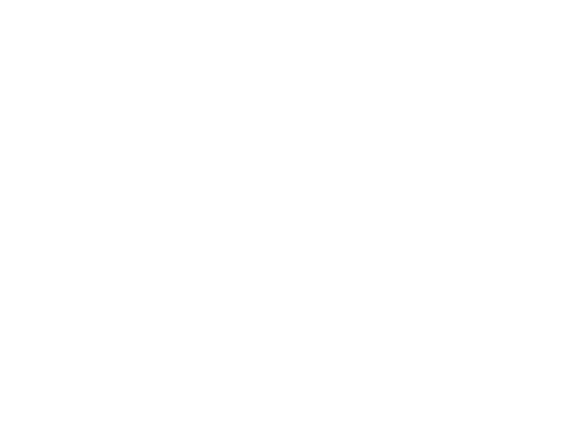

In [4]:
boxplot(X,'Orientation','horizontal','Labels',pizzadata.Properties.VariableNames(3:end))
title('Original data')

we should normalize the data, first by removing **averages**

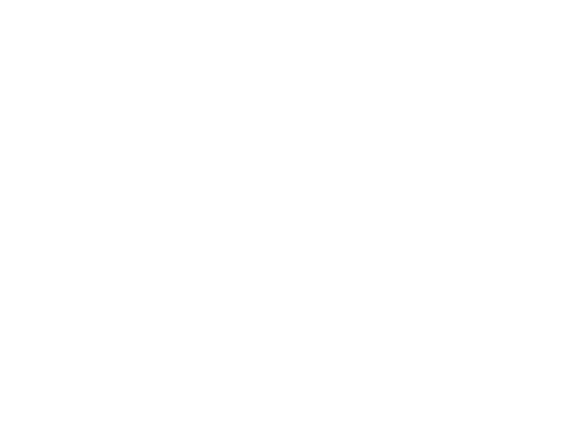

In [5]:
X = X - mean(X);
boxplot(X,'Orientation','horizontal','Labels',pizzadata.Properties.VariableNames(3:end))
title('Normalized around the mean')

and also normalizing with respect to the **standard deviation**

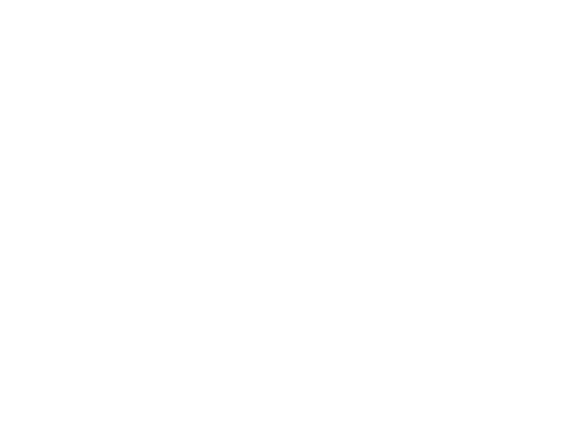

In [6]:
X = X./std(X);
boxplot(X,'Orientation','horizontal','Labels',pizzadata.Properties.VariableNames(3:end))
title('Normalized data (mean,std)')

We now have two ways in front of us, calculate the correlation matrix, or work
directly with the $X$ matrix. Let's start with the first.
The **correlation matrix** can be computed by doing:

In [7]:
C = (X'*X)/(n-1);

or using the relevant MATLAB function `corr`, that is
```{code-block} matlab
C = corr(X);
```
we can check that the two quantities are indeed the same by looking at

In [8]:
fprintf("|| (X'*X)/(n-1) - corr(X) ||_infty = %e\n",norm(C -  corr(X),"inf"));

|| (X'*X)/(n-1) - corr(X) ||_infty = 1.738193e-15


Then the PCA can be obtained by using the **eigendecomposition** of $C$.

:::{prf:definition}
Given a matrix $A \in \mathbb{C}^{p \times p}$ we say that $\mathbf{0} \neq \mathbf{v}  \in \mathbb{C}^{p}$
is an **eigenvector** of matrix $A$ related to the **eigenvalue** $\lambda \in \mathbb{C}$ if
```{math}
 A \mathbf{v} = \lambda \mathbf{v}.
```
If $A$ admits $p$ *linearly independent* eigenvectors we can then decompose
```{math}
A = V \Lambda V^{-1}, \quad \Lambda = \operatorname{diag}(\lambda_1,\ldots,\lambda_p), \; V = [\mathbf{v}_1,\ldots,\mathbf{v}_p].
```
Furthermore, if $A = A^H$ then we know that such *linearly independent* eigenvectors
always exist and the matrix $V$ can be selected to be *orthogonal*, i.e., $V^T = V^{-1}$.
:::

The eigenvectors are then the **principal axes** or **principal directions** of
the data. Projections of the data on the principal axes are the **principal components**,
or the **PC scores**, i.e., the new **transformed variables**:
- the $j$th principal component is given by $j$th column of $XV$,
- the coordinates of the $i$th data point in the new space are given by the $i$th row of $XV$.

We can **compute them in MATLAB** by using the `eig` command

In [9]:
help eig

 eig - Eigenvalues and eigenvectors
    This MATLAB function returns a column vector containing the eigenvalues
    of square matrix A.

    Syntax
      e = eig(A)
      [V,D] = eig(A)
      [V,D,W] = eig(A)

      e = eig(A,B)
      [V,D] = eig(A,B)
      [V,D,W] = eig(A,B)

      [___] = eig(A,balanceOption)
      [___] = eig(A,B,algorithm)

      [___] = eig(___,outputForm)

    Input Arguments
      A - Input matrix
        square matrix
      B - Generalized eigenvalue problem input matrix
        square matrix
      balanceOption - Balance option
        "balance" (default) | "nobalance"
      algorithm - Generalized eigenvalue algorithm
        "chol" (default) | "qz"
      outputForm - Output format of eigenvalues
        "vector" | "matrix"

    Output Arguments
      e - Eigenvalues (returned as vector)
        column vector
      V - Right eigenvectors
        square matrix
      D - Eigenvalues (returned as matrix)
        diagonal matrix
      W - Left eigenvectors
      

mples
      openExample('matlab/EigenvaluesofMatrixExample')
      openExample('matlab/EigenvaluesandEigenvectorsofMatrixExample')
      openExample('matlab/SortedEigenvaluesAndEigenvectorsExample')
      openExample('matlab/LeftEigenvectorsExample')
      openExample('matlab/EigenvaluesofNondiagonalizableDefectiveMatrixExample')
      openExample('matlab/GeneralizedEigenvaluesExample')
      openExample('matlab/GeneralizedEigenvaluesUsingQZAlgorithmforBadlyConditioneExample')
      openExample('matlab/GeneralizedEigenvaluesWhereOneMatrixisSingularExample')

    See also eigs, polyeig, balance, condeig, cdf2rdf, hess, schur, qz

    Introduced in MATLAB before R2006a
    Documentation for eig
       doc eig

    Other uses of eig

       codistributed/eig    gpuArray/eig    sym/eig    symbolic/eig



In our case this reduces to

In [10]:
[V,L] = eig(C);

and we can visualize the component variances by doing

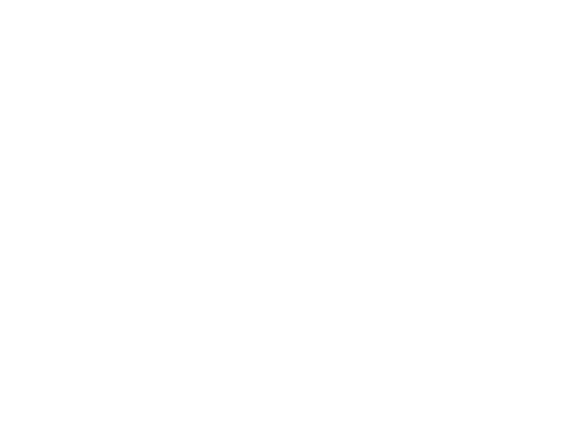

In [11]:
figure(1)
semilogy(1:p,sort(diag(L),"descend"),'o')
xlabel("p")
ylabel("Component variances")

### PCA from SVD

We can now travel the second road and use the SVD on $X$. In MATLAB the **singular value decomposition**
(SVD) can be computed with the `svd`
command:

In [12]:
help svd

 svd - Singular value decomposition
    This MATLAB function returns the singular values of matrix A in
    descending order.

    Syntax
      S = svd(A)
      [U,S,V] = svd(A)
      [___] = svd(A,"econ")
      [___] = svd(A,0)
      [___] = svd(___,outputForm)

    Input Arguments
      A - Input matrix
        matrix
      outputForm - Output format of singular values
        "vector" | "matrix"

    Output Arguments
      U - Left singular vectors
        matrix
      S - Singular values
        diagonal matrix | column vector
      V - Right singular vectors
        matrix

    Examples
      openExample('matlab/SingularValuesOfMatrixExample')
      openExample('matlab/SingularValueDecompositionExample')
      openExample('matlab/EconomySizeDecompositionExample')
      openExample('matlab/SVDOutputFormatExample')
      openExample('matlab/RankColumnSpaceAndNullSpaceOfMatrixExample')

    See also svds, svdsketch, pagesvd, svdappend, rank, orth, null, gsvd

    Introduced in MATLAB

entation for svd
       doc svd

    Other uses of svd

       codistributed/svd    gpuArray/svd    sym/svd    tall/svd
       double/svd



If we now perform singular value decomposition of $X$, we obtain a decomposition
$X = U \Sigma W^T$. From here one can easily see that
```{math}
C = W \Sigma U^T U \Sigma W^T = W \Sigma^2 W^T \equiv V \Lambda V^T.
```
This can be done with few lines of code:

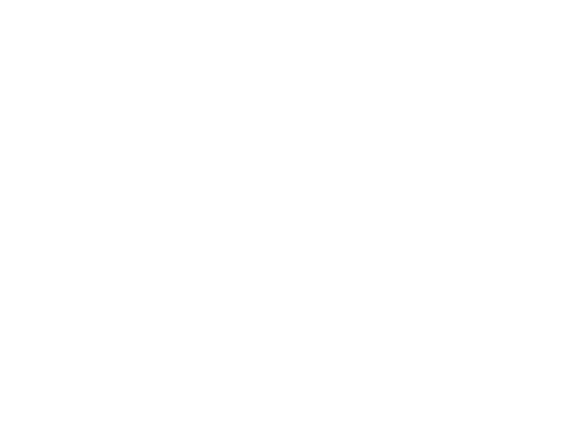

In [13]:
[W,S,U] = svd(C);
figure(1)
semilogy(1:p,sort(diag(L),"descend"),'o',1:p,diag(S),'x')
xlabel("p")
ylabel("Component variances")
legend({'EIG','SVD'},'Location','east')

### Using the MATLAB routine

Both strategies are already implemented in a suitable MATLAB command `pca`, that
we can investigate by doing

In [14]:
help pca

 pca - Principal component analysis of raw data
    This MATLAB function returns the principal component coefficients, also
    known as loadings, for the n-by-p data matrix X.

    Syntax
      coeff = pca(X)
      coeff = pca(X,Name,Value)
      [coeff,score,latent] = pca(___)
      [coeff,score,latent,tsquared] = pca(___)
      [coeff,score,latent,tsquared,explained,mu] = pca(___)

    Input Arguments
      X - Input data
        matrix

    Name-Value Arguments
      Algorithm - Principal component algorithm
        'svd' (default) | 'eig' | 'als'
      Centered - Indicator for centering columns
        true (default) | false
      Economy - Indicator for economy size output
        true (default) | false
      NumComponents - Number of components requested
        number of variables (default) | scalar integer
      Rows - Action to take for NaN values
        'complete' (default) | 'pairwise' | 'all'
      Weights - Observation weights
        ones (default) | row vector
      Va

 weights
        row vector | 'variance'
      Coeff0 - Initial value for coefficients
        matrix of random values (default) | p-by-k matrix
      Score0 - Initial value for scores
        matrix of random values (default) | k-by-m matrix
      Options - Options for iterations
        structure

    Output Arguments
      coeff - Principal component coefficients
        matrix
      score - Principal component scores
        matrix
      latent - Principal component variances
        column vector
      tsquared - Hotellings T-squared statistic
        column vector
      explained - Percentage of total variance explained
        column vector
      mu - Estimated means
        row vector

    Examples
      openExample('stats/PrincipalComponentsofaDataSetExample')
      openExample('stats/WeightedPCAExample')
      openExample('stats/PCAUsingALSforMissingDataExample')
      openExample('stats/PrincipalComponentCoefficientsScoresandVariancesExample')
      openExample('stats/TSqua

    openExample('stats/PercentVariabilityExplainedbyPrincipalComponentsExample')
      openExample('stats/ApplyPCAToNewDataAndGenerateCCCodeExample')

    See also barttest, biplot, canoncorr, factoran, pcacov, pcares,
      rotatefactors, ppca, Reduce Dimensionality

    Introduced in Statistics and Machine Learning Toolbox in R2012b
    Documentation for pca
       doc pca

    Other uses of pca

       gpuArray/pca    tall/pca



For our test application this can be done

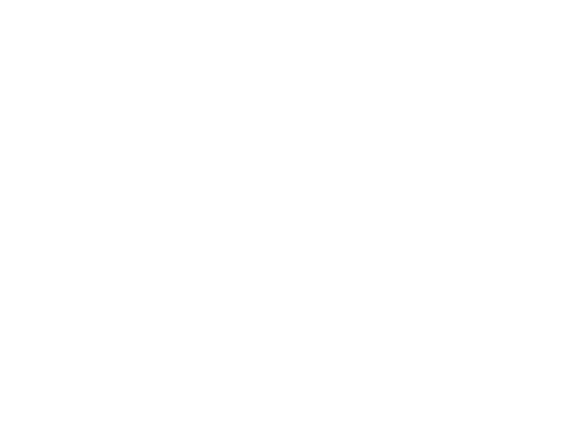

In [15]:
[coeff,score,latent,tsquared,explained,mu] = pca(X);
figure(1)
semilogy(1:p,sort(diag(L),"descend"),'o',1:p,diag(S),'x',...
  1:p,latent,'s');
xlabel("p")
ylabel("Component variances")
legend({'EIG','SVD','PCA'},'Location','east')

To visualize the result we can use a **biplot** these are a type of *exploratory graph*
often used in statistics. They are a generalization of the simple two-variable
*scatterplot*. A **biplot** overlays a *score plot* with a *loading plot*:
- samples are displayed as points,
- variables are displayed as vectors or linear axes.
We can do this in MATLAB by doing:

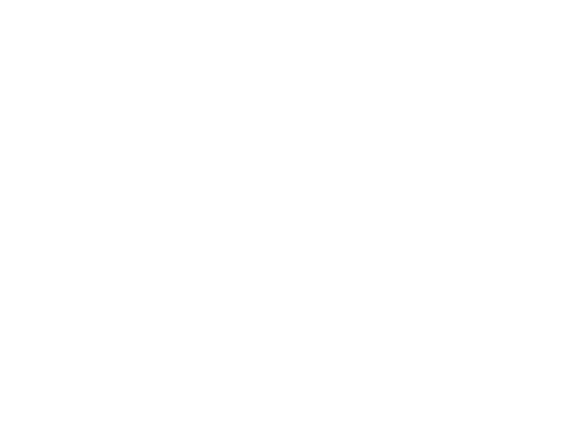

In [16]:
biplot(coeff(:,1:2),'scores',score(:,1:2),'varlabels',pizzadata.Properties.VariableNames(3:end));

We have chosen to display only the first two components because these already
explain most of the data:

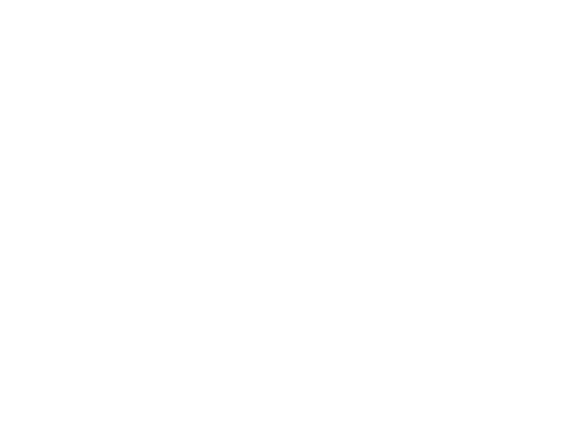

In [17]:
pareto(explained)

You can choose **between the two construction algorithms** that we have seen by
selecting either
```{code-block} matlab
[coeff,score,latent,tsquared,explained,mu] = pca(X,"Algorithm","svd");
```
or
```{code-block} matlab
[coeff,score,latent,tsquared,explained,mu] = pca(X,"Algorithm","eig");
```

## Nonnegative Matrix Factorization

If we look at some of the values obtained in the factorization these are negative.
This makes the results obtained less interpretable than we would like. Let us
consider another example.

Let us start from another dataset called the **MIT CBCL FACE DATABASE** that can be
[downloaded from here](http://www.ai.mit.edu/courses/6.899/lectures/faces.tar.gz).

We first **read the data**

In [18]:
p = 100;
data = cell(p,1);
index = 1;
for i=1:5:5*p
    % Put in the following the right path to your data!
    data{index} = imread(sprintf("data/faces/face.train/train/face/face%05d.pgm",i));
    index = index+1;
end

and visualize (few) of them

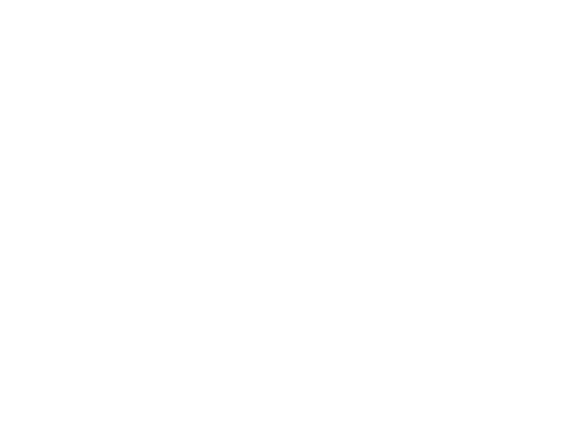

In [19]:
figure(1)
for i=1:20
    subplot(4,5,i)
    imshow(data{i});
end

We can use the PCA to extract some features of the data:

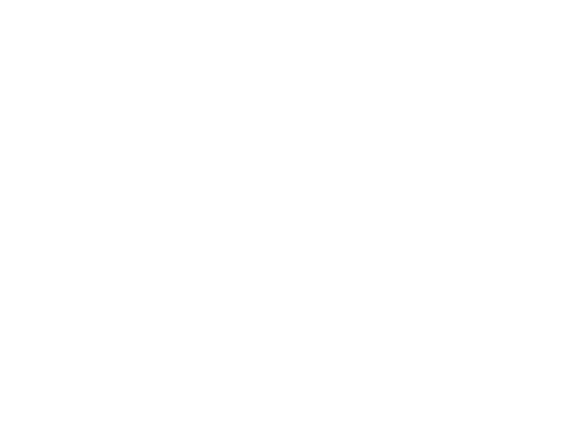

In [20]:
n = size(data{1},1);
X = zeros(n^2,p);
for i=1:p
    X(:,i) = data{i}(:);
end
[coeff,score,latent] = pca(double(X));
% Characters
for i=1:20
 figure(2)
 subplot(4,5,i)
 imshow(reshape(int8(score(:,i)),n,n));
end

The features are not very descriptive, they have many zone that are made of
**negative numbers**, they do not correspond to any interpretable data.

We can use instead the Nonnegative Matrix Factorization (`nnmf`) to require for
all entries to be positive, i.e., for all extracted feature to be interpretable.
This approach refers to a group of algorithms in numerical linear algebra
where the matrix of data $X$ is factorized into (usually) two matrices $W$ and $H$,
with the property that **all three matrices have no negative elements**.
This non-negativity makes the resulting matrices easier to inspect.

```{warning}
Usually an exact factorization of this type does not exist. So we have to
approximate what we have. The number of columns of $W$ and the number of rows
of $H$ in NMF should be selected so the product $WH$ will become an
approximation to $V$. Since this will be only an approximation, a **residual** $U$,
such that: $V = WH + U$ with elements that can either be negative or positive will
always be there.
```

This can be done with:

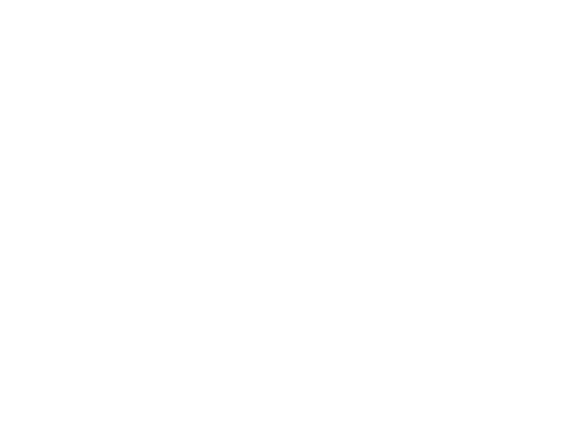

In [21]:
[W,H,D] = nnmf(double(X),10,"replicates",10);
for i=1:size(W,2)
 figure(3)
 subplot(2,5,i)
 imshow(reshape(int8(W(:,i)),n,n));
end